
#### ANY FEEDBACK IN THE COMMENTS WILL BE HIGHLY APPRECIATED.

Breakdown of this notebook:
1. Loading the dataset: Load the data and import the libraries.
2. Data Preprocessing:
     - Analysing missing data 
     - Removing redundant columns.
3. Visualising and counting sentiments of tweets for each airline
4. Wordcloud plots for positive and negative tweets to visualise most frequent words for each.
5. Analysing the reasons for negative tweets for each airline.
6. Visualising negative tweet-sentiment relationship with dates.
7. Predicting the tweet sentiments with tweet text data with:
      - Decision Tree Classifier
      - Random Forest Classifier
8. Calculating accuracies, plotting the confusion matrix and comparing the models.

### References:- 
I learnt a lot from this blog which shows you how to handle nlp data and implement data preprocessing and explanatory visualization for better understanding.

https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/

### Importing the libraries and loading the data

In [149]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
# Any results you write to the current directory are saved as output.

['Tweets.csv', 'database.sqlite']


In [150]:
df= pd.read_csv("../input/Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### Data Preprocessing

The first step should be to check the shape of the dataframe and then check the number of null values in each column.

In this way we can get an idea of the redundant columns in the data frame depending on which columns have the highest number of null values.

In [151]:
print("Shape of the dataframe is",df.shape)
print("The number of nulls in each column are \n", df.isna().sum())

Shape of the dataframe is (14640, 15)
The number of nulls in each column are 
 tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


To get a better idea, lets calculate the percentage of nulls or NA values in each column

In [152]:
print("Percentage null or na values in df")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage null or na values in df


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

**tweet_coord , airline_sentiment_gold, negativereason_gold**  have more than 90% missing data. It will be better to delete these columns as they will not provide any constructive information.



In [153]:
del df['tweet_coord']
del df['airline_sentiment_gold']
del df['negativereason_gold']
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### Airline sentiments for each airline


- Firstly lets calculate the total number of tweets for each airline
- Then, we are going to get the barplots for each airline with respect to sentiments of tweets (positive,negative or neutral).
- This will give us a clearer idea about the airline sentiments , airlines relationship. 

Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


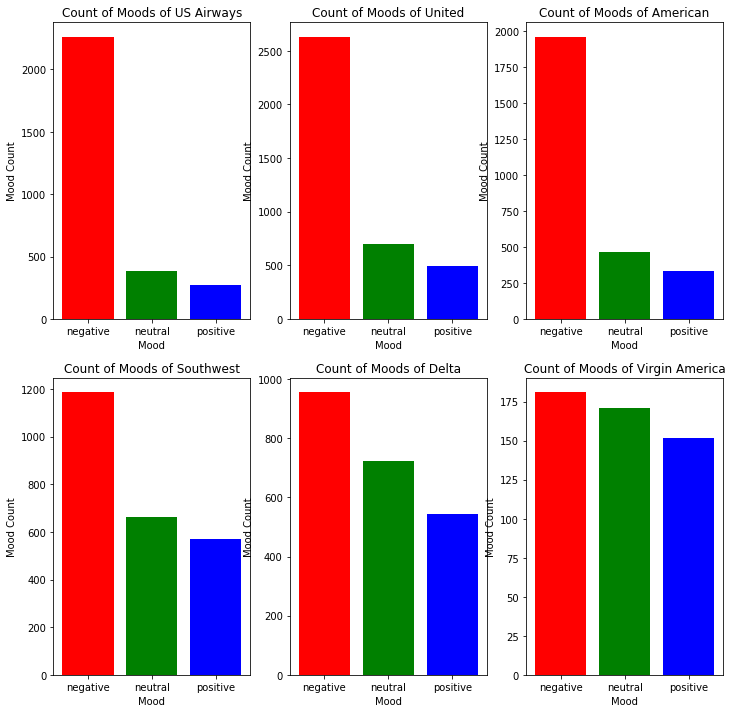

In [154]:
print("Total number of tweets for each airline \n ",df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(12, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=df[df['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['red', 'green', 'blue'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)

 - United, US Airways, American substantially get negative reactions.
 - Tweets for Virgin America are the most balanced.

## Most used words in Positive and Negative tweets 

In [155]:
from wordcloud import WordCloud,STOPWORDS


- The goal is to firstly get an idea of the most frequent words in negative tweets.
- Get idea about most frequent words in positive tweets.

### Wordcloud for Negative sentiments of tweets

Wordcloud is a great tool for visualizing nlp data. The larger the words in the wordcloud image , the more is the frequency of that word in our text data.

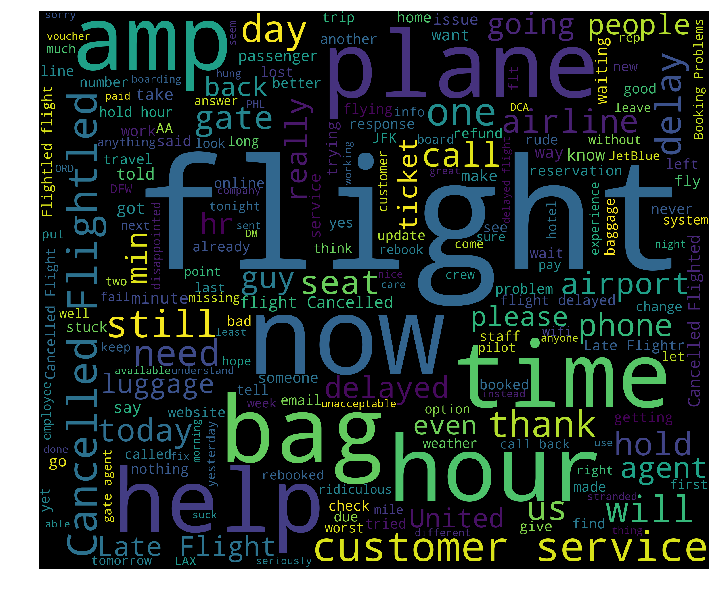

In [156]:
new_df=df[df['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Wordcloud for positive reasons

The code for getting positive sentiments is completely same with the one for negative sentiments. Just replace negative with positive in the first line. Easy, right!

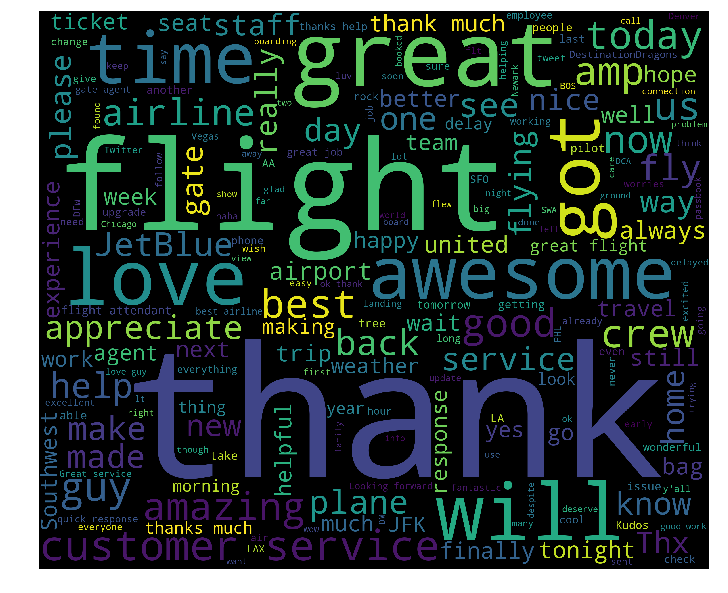

In [157]:
new_df=df[df['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Lets try and calculate the highest frequency words in postive sentimental tweets

In [158]:


# Calculate highest frequency words in positive tweets
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
        if(str.count(str2[i])>50): 
            print('Frequency of', str2[i], 'is :', str.count(str2[i]))
        
print(freq(cleaned_word))

Frequency of to is : 923
Frequency of the is : 924
Frequency of time is : 59
Frequency of I is : 574
Frequency of fly is : 54
Frequency of this is : 143
Frequency of :) is : 96
Frequency of it is : 166
Frequency of was is : 226
Frequency of and is : 416
Frequency of an is : 74
Frequency of good is : 75
Frequency of so is : 163
Frequency of much is : 54
Frequency of is is : 219
Frequency of a is : 501
Frequency of great is : 144
Frequency of my is : 320
Frequency of &amp; is : 77
Frequency of on is : 327
Frequency of I'm is : 67
Frequency of flying is : 59
Frequency of your is : 212
Frequency of all is : 92
Frequency of from is : 124
Frequency of Thanks! is : 69
Frequency of for is : 658
Frequency of flight is : 263
Frequency of but is : 91
Frequency of you is : 509
Frequency of would is : 56
Frequency of be is : 135
Frequency of with is : 195
Frequency of you. is : 77
Frequency of love is : 85
Frequency of You is : 62
Frequency of are is : 120
Frequency of of is : 236
Frequency of that

* Words like **Thanks**, **best**, **customer** , **love**, **flying** , **good** are understandably present in the **most frequent** words of positive tweets. 
* However, other than these, most of the words are stop words and need to be filtered. We will do so later.
* Lets try and visualize the reasons for negative tweets first !!

### What are the reasons for negative sentimental tweets for each airline ?

We will explore the **negative reason** column of our dataframe to extract conclusions about negative sentiments in the tweets by the customers 

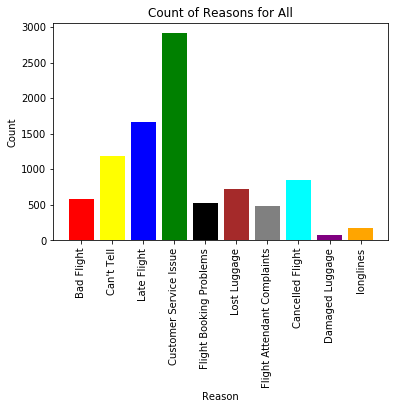

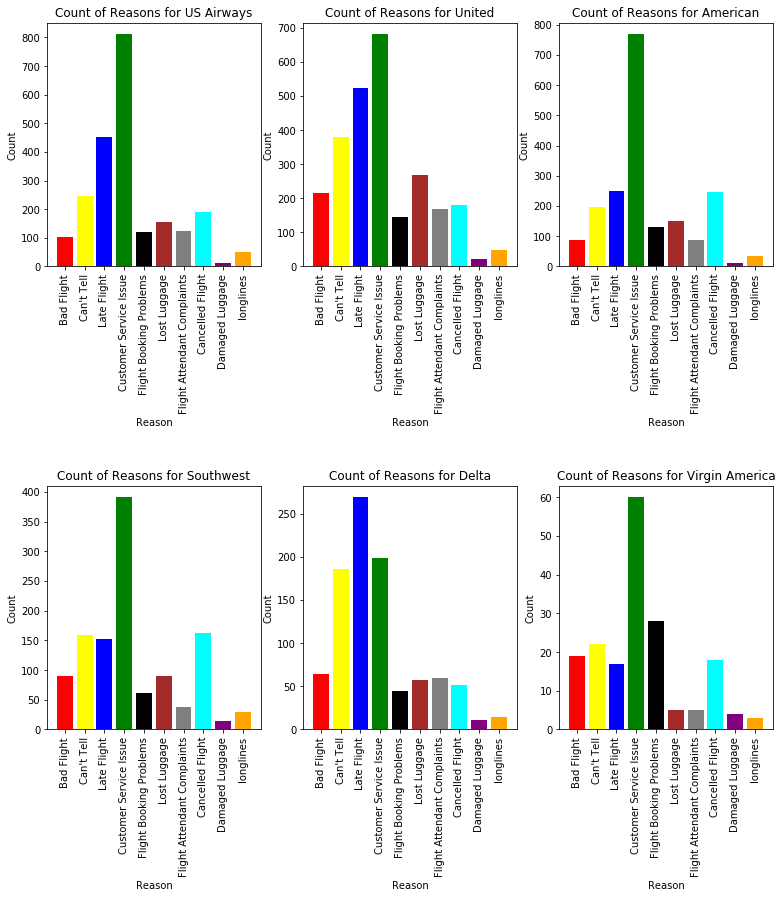

In [159]:
#get the number of negative reasons
df['negativereason'].nunique()

NR_Count=dict(df['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        a=df
    else:
        a=df[df['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame
def plot_reason(Airline):
    
    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)
    
plot_reason('All')
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

- Customer Service Issue is the main neagtive reason for US Airways,United,American,Southwest,Virgin America
- Late Flight is the main negative reason for Delta  
- Interestingly, Virgin America has the least count of negative reasons (all less than 60)
- Contrastingly to Virgin America, airlines like US Airways,United,American have more than 500 negative reasons (Late flight, Customer Service Issue)

### Is there a relationship between negative sentiments and date ?

Our dataframe has data from **2015-02-17** to **2015-02-24**

It will be interesting to see if the date has any effect on the sentiments of the tweets(*especially negative !*). We can draw various coclusions by visualizing this.

In [160]:
date = df.reset_index()
#convert the Date column to pandas datetime
date.tweet_created = pd.to_datetime(date.tweet_created)
#Reduce the dates in the date column to only the date and no time stamp using the 'dt.date' method
date.tweet_created = date.tweet_created.dt.date
date.tweet_created.head()
df = date
day_df = df.groupby(['tweet_created','airline','airline_sentiment']).size()
# day_df = day_df.reset_index()
day_df

tweet_created  airline         airline_sentiment
2015-02-17     Delta           negative              51
                               neutral               63
                               positive              47
               Southwest       negative             162
                               neutral               69
                               positive              56
               US Airways      negative             156
                               neutral               22
                               positive              33
               United          negative             173
                               neutral               50
                               positive              29
               Virgin America  negative              10
                               neutral               16
                               positive              16
2015-02-18     Delta           negative             127
                               neutral               84

This shows the sentiments of tweets for each date from **2015-02-17** to **2015-02-24** for every airline in our dataframe.

Our next step will be to plot this and get better visualization for negative tweets.

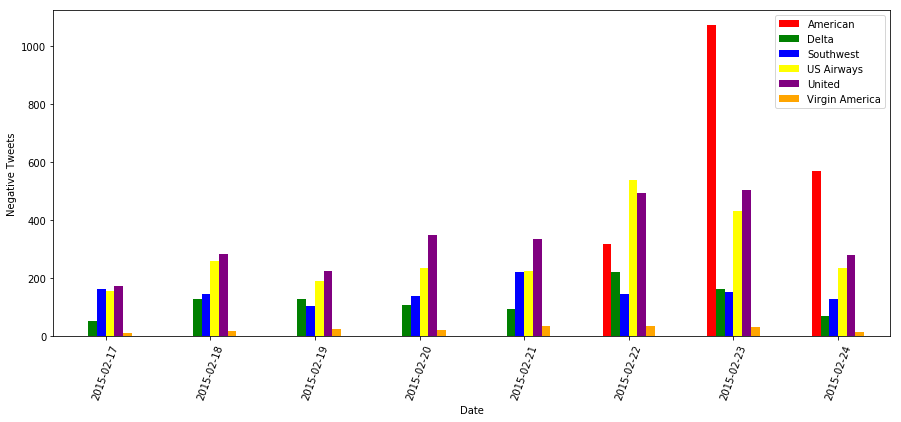

In [161]:
day_df = day_df.loc(axis=0)[:,:,'negative']

#groupby and plot data
ax2 = day_df.groupby(['tweet_created','airline']).sum().unstack().plot(kind = 'bar', color=['red', 'green', 'blue','yellow','purple','orange'], figsize = (15,6), rot = 70)
labels = ['American','Delta','Southwest','US Airways','United','Virgin America']
ax2.legend(labels = labels)
ax2.set_xlabel('Date')
ax2.set_ylabel('Negative Tweets')
plt.show()

- Interestingly, **American** has a sudden upsurge in negative sentimental tweets on **2015-02-23**, which reduced to half the very next day **2015-02-24**. (*I hope American is doing better these days and resolved their Customer Service Issue as we saw before*)
- **Virgin America** has the least number of negative tweets throughout the weekly data that we have. It should be noted that the total number of tweets for **Virgin America** was also significantly less as compared to the rest airlines, and hence the least negative tweets.
- The negative tweets for all the rest airlines is slightly skewed towards the end of the week !

### Preprocessing the tweet text data

Now, we will clean the tweet text data and apply classification algorithms on it

In [162]:
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [163]:
df['clean_tweet']=df['text'].apply(lambda x: tweet_to_words(x))


The data is split in the standard 80,20 ratio.

In [164]:
train,test = train_test_split(df,test_size=0.2,random_state=42)


In [165]:
train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

In [166]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

### Prediciting sentiments from tweet text data 

- Decision Tree Classifier
- Random Forest Classifier

In [167]:
Classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200)]

Accuracy of DecisionTreeClassifieris 0.6827185792349727
              precision    recall  f1-score   support

    negative       0.79      0.80      0.79      1857
     neutral       0.43      0.40      0.42       629
    positive       0.57      0.60      0.58       442

   micro avg       0.68      0.68      0.68      2928
   macro avg       0.60      0.60      0.60      2928
weighted avg       0.68      0.68      0.68      2928



<Figure size 432x288 with 0 Axes>

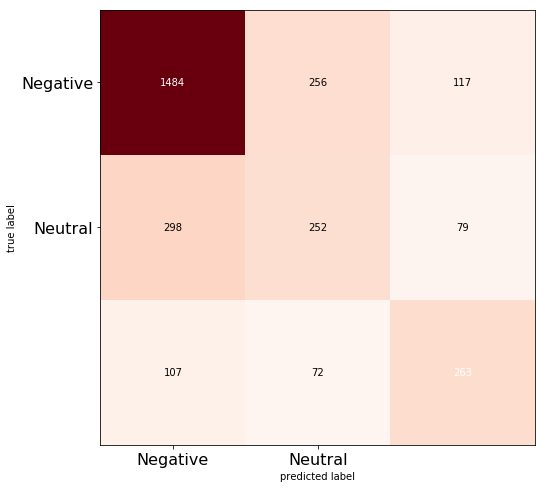

Accuracy of RandomForestClassifieris 0.7725409836065574
              precision    recall  f1-score   support

    negative       0.91      0.82      0.86      2094
     neutral       0.46      0.58      0.52       461
    positive       0.60      0.74      0.67       373

   micro avg       0.77      0.77      0.77      2928
   macro avg       0.66      0.72      0.68      2928
weighted avg       0.80      0.77      0.78      2928



<Figure size 432x288 with 0 Axes>

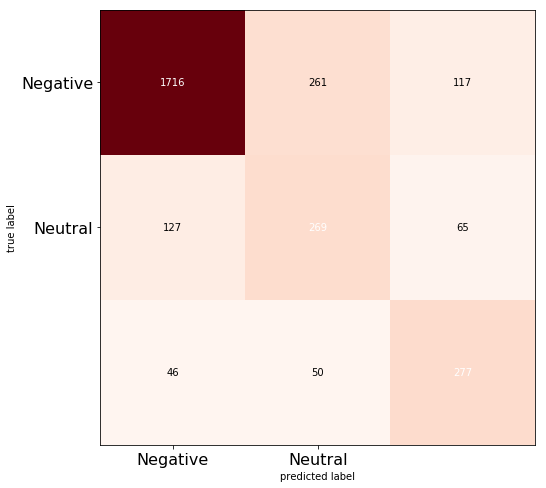

In [168]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['airline_sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['airline_sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['airline_sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))
    print(classification_report(pred,test['airline_sentiment']))
    cm=confusion_matrix(pred , test['airline_sentiment'])
    plt.figure()
    plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
    plt.xticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
    plt.yticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16)
    plt.show()

- As we you can see above we have plotted the **confusion matrix** for predicted sentiments and actual sentiments (negative,neutral and positive)
- **Random Forest Classifier** gives us the best accuracy score, precision scores according to the classification report.
- The confusion matrix shows the TP,TN,FP,FN for all the 3 sentiments(negative,neutral and positive),Here also **Random Forest Classifier** gives **better** results than the **Decision Tree Classifier**.



#### Please feel free to upvote and comment if you found this to be helpful !!